In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("./uber.csv")

In [28]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [30]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [31]:
df = df.dropna()

In [32]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [33]:
num = df.select_dtypes(include=['int64','float64'])
corr = num.corr()
corr

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,0.000587,0.000230,-0.000341,0.000270,0.000271,0.002259
fare_amount,0.000587,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010158
pickup_longitude,0.000230,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000415
pickup_latitude,-0.000341,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001559
dropoff_longitude,0.000270,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,0.000271,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.002259,0.010158,-0.000415,-0.001559,0.000033,-0.000659,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x18f825cac40>,
 'caps': [<matplotlib.lines.Line2D at 0x18f825d8220>,
 'boxes': [<matplotlib.lines.Line2D at 0x18f825ca970>],
 'medians': [<matplotlib.lines.Line2D at 0x18f825d87c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18f825d8a90>],
 'means': []}

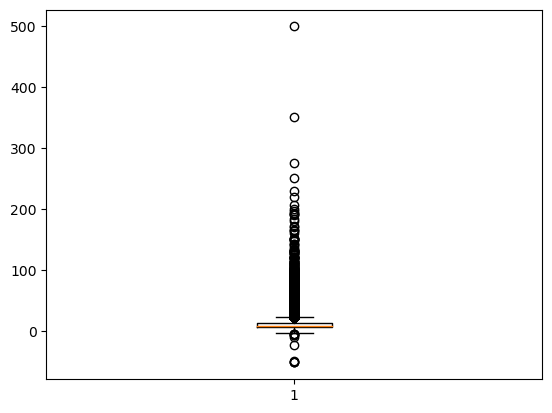

In [34]:
plt.boxplot(df["fare_amount"])

In [35]:
q_low = df["fare_amount"].quantile(0.01)
q_hi  = df["fare_amount"].quantile(0.99)

df = df[(df["fare_amount"] < q_hi) & (df["fare_amount"] > q_low)]

{'whiskers': [<matplotlib.lines.Line2D at 0x18f82775d60>,
 'caps': [<matplotlib.lines.Line2D at 0x18f82605340>,
 'boxes': [<matplotlib.lines.Line2D at 0x18f82775a90>],
 'medians': [<matplotlib.lines.Line2D at 0x18f826058e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18f82605bb0>],
 'means': []}

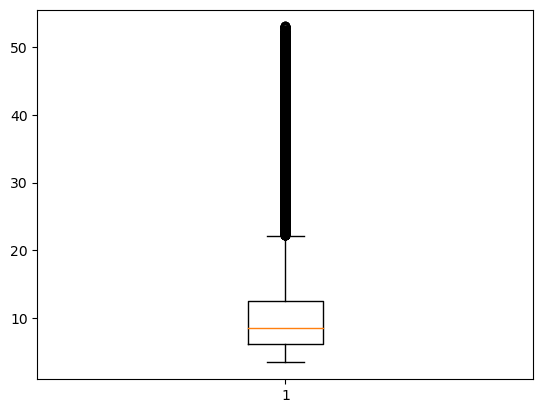

In [36]:
plt.boxplot(df["fare_amount"])

In [37]:
X = df.select_dtypes(include = ['int64','float64'])
X = X.drop("fare_amount",axis=1)
X

,Unnamed: 0,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199994,3189201,-73.983070,40.760770,-73.972972,40.754177,1
199996,16382965,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,-73.997124,40.725452,-73.983215,40.695415,1


In [38]:
Y = df["fare_amount"]
Y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199994    12.0
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: fare_amount, Length: 194911, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.25)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lmodel = LinearRegression()
lmodel.fit(x_train,y_train)

LinearRegression()

In [43]:
lpred = lmodel.predict(x_test)

In [44]:
from sklearn.metrics import mean_squared_error,r2_score

In [45]:
print(np.sqrt(mean_squared_error(lpred,y_test)))
print(r2_score(lpred,y_test))

7.998431829317289
-4319.067173728486


In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
rfrmodel = RandomForestRegressor(n_estimators = 10, random_state = 10)

In [49]:
rfrmodel.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=10)

In [50]:
rfr_pred = rfrmodel.predict(x_test)

In [51]:
print(np.sqrt(mean_squared_error(rfr_pred,y_test)))
print(r2_score(rfr_pred,y_test))

3.774273489402184
0.7316676632913551
